# Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

C:\Software\Anaconda 3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Software\Anaconda 3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Software\Anaconda 3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [3]:
# Read the excel file and save it into variable solar_df
solar_df = pd.read_csv('solar power.csv')
solar_df.head()

,Date,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,1/9/2008,1:00,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,1/9/2008,4:00,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,1/9/2008,7:00,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,1/9/2008,10:00,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,1/9/2008,13:00,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


# Data Understanding

In [4]:
# Get the infomation of solar dataframe
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  2920 non-null   object 
 1   First Hour of Period                  2920 non-null   object 
 2   Is Daylight                           2920 non-null   bool   
 3   Distance to Solar Noon                2920 non-null   float64
 4   Average Temperature (Day)             2920 non-null   int64  
 5   Average Wind Direction (Day)          2920 non-null   int64  
 6   Average Wind Speed (Day)              2920 non-null   float64
 7   Sky Cover                             2920 non-null   int64  
 8   Visibility                            2920 non-null   float64
 9   Relative Humidity                     2920 non-null   int64  
 10  Average Wind Speed (Period)           2919 non-null   float64
 11  Average Barometri

In [5]:
# Understand the descriptive statistic of the dataframe
solar_df.describe()

,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6996.839726
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10325.899609
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12753.250000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [6]:
# Get the amount of NaN or null value in the dataframe
solar_df.isnull().sum()

Date                                    0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             1
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64

# Exploratory Data Analysis (EDA)

In [7]:
solar_corr = solar_df.corr()

triu_index = np.triu_indices_from(solar_corr)
for row, column in zip(*triu_index):
    solar_corr.iloc[row, column] = np.NaN
    
solar_corr

,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
Is Daylight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance to Solar Noon,-0.827072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Temperature (Day),0.067230,-0.145207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Wind Direction (Day),0.056284,-0.118010,0.342146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Wind Speed (Day),0.059940,-0.145073,0.096267,0.341529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sky Cover,0.028587,-0.015184,-0.230672,-0.137140,0.107793,NaN,NaN,NaN,NaN,NaN,NaN
Visibility,-0.087069,0.065807,0.194110,0.203445,0.184778,-0.223523,NaN,NaN,NaN,NaN,NaN
Relative Humidity,-0.340942,0.368964,-0.221463,-0.095917,0.004901,0.394576,-0.291320,NaN,NaN,NaN,NaN
Average Wind Speed (Period),0.192290,-0.214891,0.054546,0.229844,0.673626,0.044301,0.143621,-0.218042,NaN,NaN,NaN
Average Barometric Pressure (Period),-0.053754,0.082505,-0.435723,-0.272405,-0.379752,-0.091512,-0.105345,0.018489,-0.293457,NaN,NaN


In [8]:
solar_corr.loc['Power Generated'].sort_values().to_frame().dropna()

,Power Generated
Distance to Solar Noon,-0.747811
Relative Humidity,-0.522578
Sky Cover,-0.188142
Average Barometric Pressure (Period),-0.037931
Visibility,0.076962
Average Temperature (Day),0.134020
Average Wind Speed (Day),0.142817
Average Wind Direction (Day),0.147538
Average Wind Speed (Period),0.276839
Is Daylight,0.532657


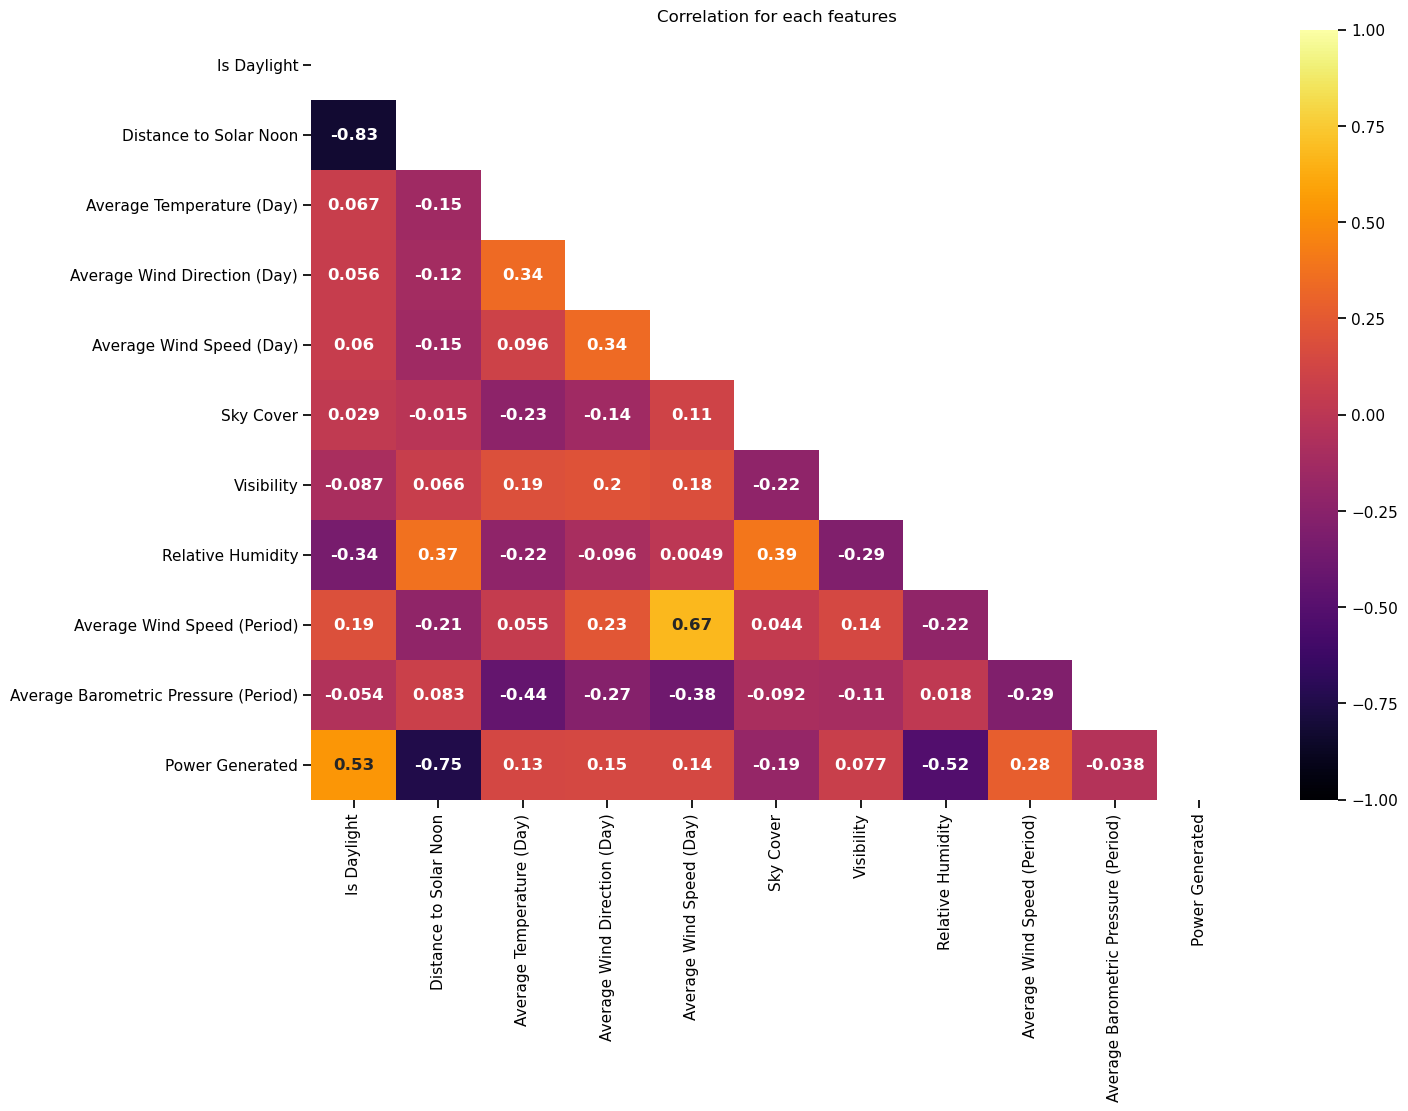

In [9]:
sns.set_context('notebook')
plt.figure(figsize=(15,10))
sns.heatmap(solar_corr, annot=True, annot_kws={'weight':'bold'}, cmap='inferno', vmin=-1, vmax=1)
plt.title('Correlation for each features')
plt.show()

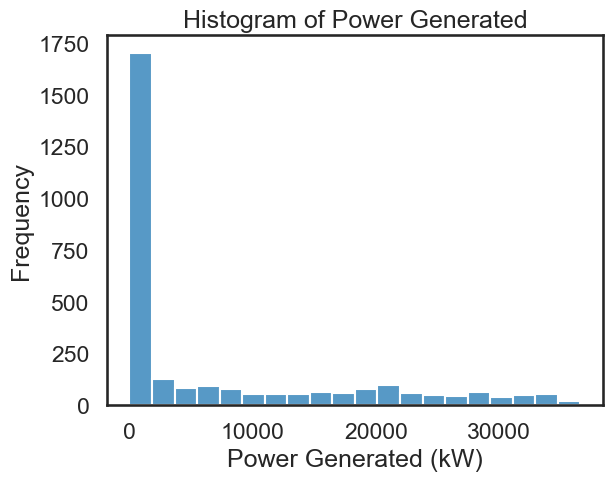

In [10]:
sns.set_style('white')
sns.set_context('talk')

# Visualize the histogram of Power Generated that binned into 20 classes.
sns.histplot(solar_df['Power Generated'], bins=20)
plt.xlabel('Power Generated (kW)')
plt.ylabel('Frequency')
plt.title('Histogram of Power Generated')
plt.show()

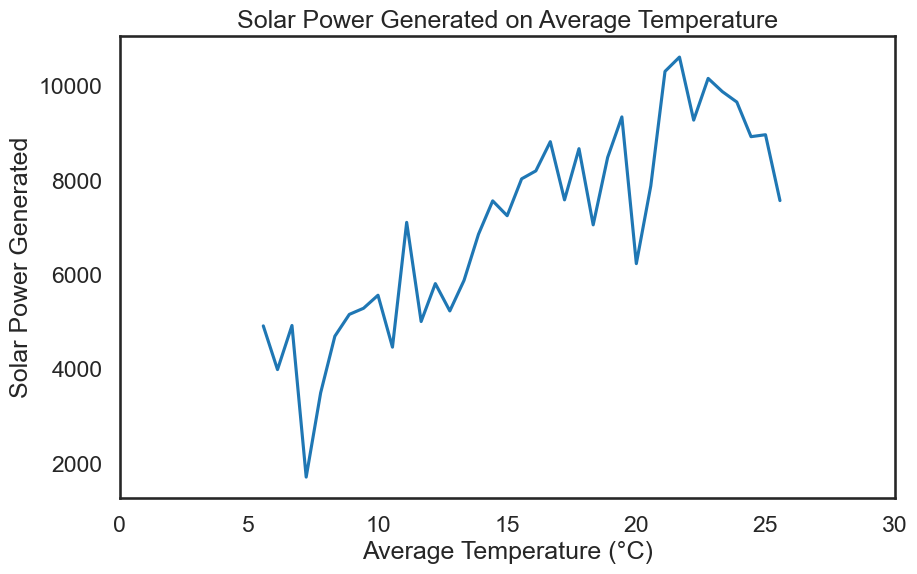

In [11]:
# Since the column 'Average Temperature (Day) is in Fahrenheit unit, change it into Degree Celsius unit'
solar_df['Average Temperature (°C)'] = round((solar_df['Average Temperature (Day)']- 32)*(5/9), 2)

# Visualize the relationship of Solar Power Generated vs Average Temperature
plt.figure(figsize=(10,6))
avg_temp = solar_df.groupby('Average Temperature (°C)')['Power Generated'].mean()
avg_temp.plot(title='Solar Power Generated on Average Temperature', ylabel='Solar Power Generated')
plt.xlim(0,30)
plt.show()

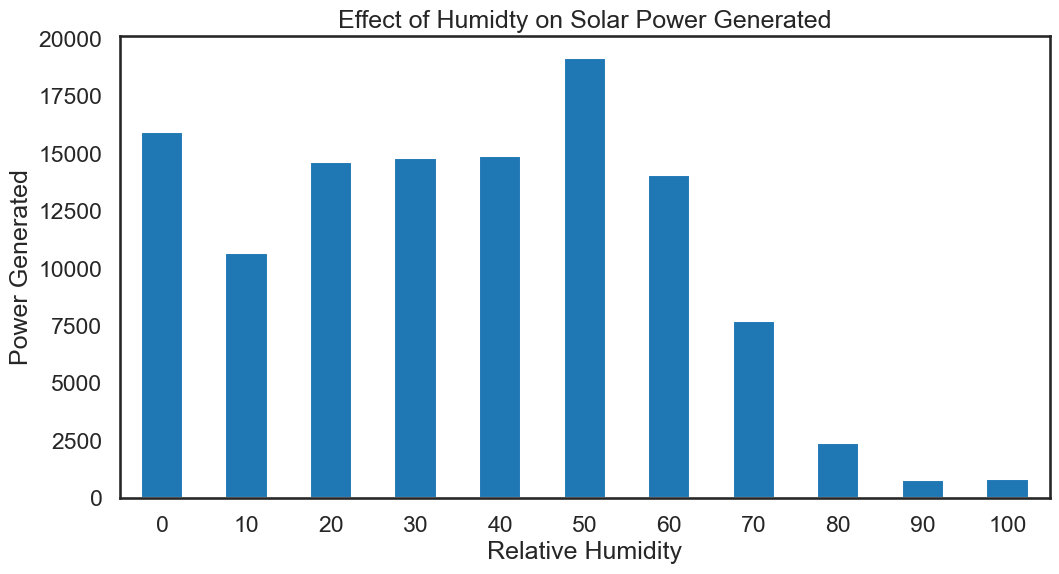

In [12]:
# Category the Relative Humidity into bins from 0 to 100.
humidity = solar_df[['Relative Humidity','Power Generated']]
humidity['Relative Humidity Category'] = pd.cut(humidity['Relative Humidity'], bins=11,
                                                labels= [n for n in range(0,110, 10)])

# Visualize the relationship of Relative Humidity and Solar Power Generated.
humidity_cat = humidity.groupby('Relative Humidity Category')['Power Generated'].mean()
humidity_cat.plot(kind='bar', x = 'Relative Humidity Category', y='Power Generated',
              title='Effect of Humidty on Solar Power Generated', ylabel='Power Generated', xlabel='Relative Humidity', 
                  xlim=(5,110), figsize=(12,6))
plt.xticks(rotation=0)
plt.show()

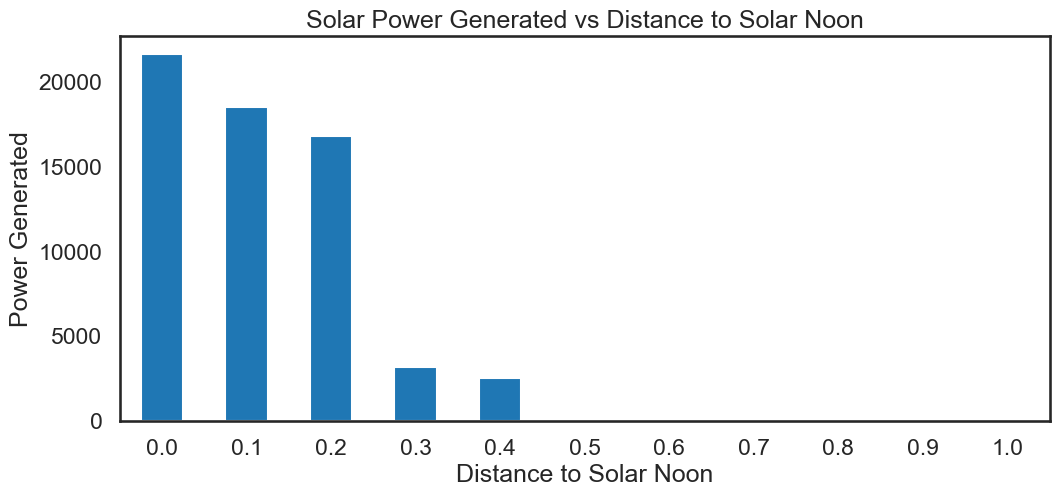

In [13]:
# Category the Distance to Solar Noon into bins from 0 to 100.

distance_noon = solar_df[['Distance to Solar Noon', 'Power Generated']]
distance_noon['Category'] = pd.cut(distance_noon['Distance to Solar Noon'], bins=11, 
                                   labels = [0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

# Visualize the relationship of Distance to Solar Noon and Solar Power Generated.
distance_noon_cate = distance_noon.groupby('Category')['Power Generated'].mean()
plt.figure(figsize=(12,5))
distance_noon_cate.plot(kind='bar', title='Solar Power Generated vs Distance to Solar Noon', 
                        ylabel='Power Generated', xlabel='Distance to Solar Noon')
plt.xticks(rotation=0)
plt.show()

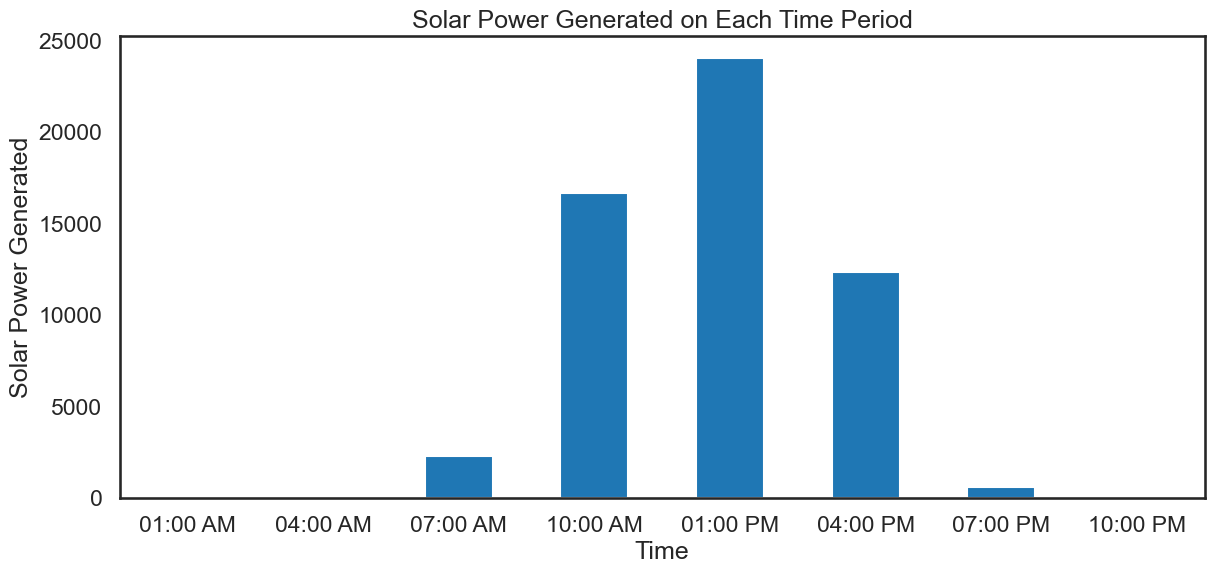

In [14]:
import datetime
# Visualize the relationship of Each Time Period and Solar Power Generated.

solar_df['First Hour of Period'] = pd.to_datetime(solar_df['First Hour of Period'], format='%H:%M').dt.time

first_hour = solar_df.groupby('First Hour of Period')['Power Generated'].mean()
first_hour_df = first_hour.reset_index()
time_12hours = []
for a in pd.to_datetime(first_hour.reset_index()['First Hour of Period'],format='%H:%M:%S'):
    time_12hours.append(a.strftime('%I:%M %p'))
    
first_hour_df['12 Hour'] = time_12hours

first_hour_df.plot(kind='bar', x = '12 Hour', y='Power Generated', xlabel='Time', ylabel='Solar Power Generated', title='Solar Power Generated on Each Time Period',
               figsize=(14,6), legend=None)
plt.xticks(rotation=0)
plt.show()

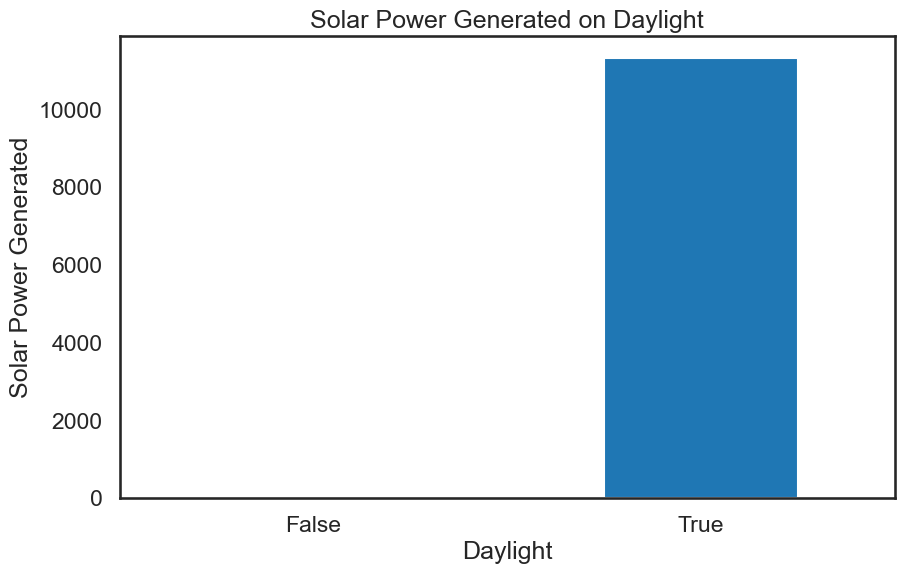

In [15]:
# Visualize that is Solar Power Generated during Daytime.
daylight = solar_df.groupby('Is Daylight')['Power Generated'].mean()
daylight.plot(kind='bar', xlabel='Daylight', ylabel='Solar Power Generated', title='Solar Power Generated on Daylight',
             figsize=(10,6))
plt.xticks([0,1], ['False', 'True'], rotation=0)
plt.show()

# Data Cleaning & Preprocessing

In [16]:
# Change Date and First Hour of Period columns in datetime format
solar_df['Date'] = pd.to_datetime(solar_df['Date'], format='%d/%m/%Y')

# Fill the null values in Average Wind Speed (Period) column with its mean.
wind_mean = solar_df['Average Wind Speed (Period)'].mean()
solar_df['Average Wind Speed (Period)'] = solar_df['Average Wind Speed (Period)'].fillna(wind_mean)



In [17]:
# Check the dataframe
solar_df.head()

,Date,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated,Average Temperature (°C)
0,2008-09-01,01:00:00,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0,20.56
1,2008-09-01,04:00:00,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0,20.56
2,2008-09-01,07:00:00,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418,20.56
3,2008-09-01,10:00:00,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477,20.56
4,2008-09-01,13:00:00,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069,20.56


In [18]:
# Change the categorical column 'Is Daylight' into numerical column (False = 0, True = 0)
le = LabelEncoder()
solar_df['Is Daylight'] = le.fit_transform(solar_df['Is Daylight'])
solar_df.head()

,Date,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated,Average Temperature (°C)
0,2008-09-01,01:00:00,0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0,20.56
1,2008-09-01,04:00:00,0,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0,20.56
2,2008-09-01,07:00:00,1,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418,20.56
3,2008-09-01,10:00:00,1,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477,20.56
4,2008-09-01,13:00:00,1,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069,20.56


In [19]:
# Remove columns that have datetime format.
features = list(solar_df)
features.remove('Date')
features.remove('First Hour of Period')

# Columns that will be included in the machine learning models later.
features

['Is Daylight',
 'Distance to Solar Noon',
 'Average Temperature (Day)',
 'Average Wind Direction (Day)',
 'Average Wind Speed (Day)',
 'Sky Cover',
 'Visibility',
 'Relative Humidity',
 'Average Wind Speed (Period)',
 'Average Barometric Pressure (Period)',
 'Power Generated',
 'Average Temperature (°C)']

# Data Splitting

In [20]:
# Split the data into X (meteorological and environmental variables) and y(solar power generated).
X = solar_df[features].drop(columns='Power Generated')
y = solar_df['Power Generated']

# Split both X and y into training and testing set with ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

ss = StandardScaler().fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [41]:
def regression_score(model, label, xt=X_test, yt=y_test):
    table = pd.Series({f'R\N{SUPERSCRIPT TWO} score': round(r2_score(yt, model.predict(xt)), 3),
                      'RMSE': round(np.sqrt(mean_squared_error(yt, model.predict(xt))), 3),
                      'MAE':round(np.mean(abs(yt - model.predict(xt).ravel())), 3)},
                  name= label)
    return table

In [100]:
def plot_bar(score_df):
    plt.figure(figsize=(5,3))
    sns.set_context('notebook')
    score_df = score_df.reset_index().rename(columns={'index':'Model'})
    sns.barplot(x='Model', y=f'R\N{SUPERSCRIPT TWO} score', data=score_df)
    plt.title(f'R\N{SUPERSCRIPT TWO} score for Each Model')
    plt.ylim(0,1.1)
    plt.xticks(rotation='90')
    
    plt.figure(figsize=(8,4))
    score_df_melt = pd.melt(score_df, value_vars=['RMSE','MAE'], var_name='Variable',id_vars=['Model'], value_name='Score')
    sns.barplot(x='Model', y='Score', data=score_df_melt, hue='Variable')
    plt.ylim(0,8500)
    plt.title('RMSE and MAE score for Each Model')
    plt.xticks(rotation=90)

# Machine Learning Models

# Scenario 1 (Full Dataset)

# 1 . Polynomial Regression

In [23]:
pipe_lr = Pipeline(steps=[('pr', PolynomialFeatures(degree=2, include_bias=False)),
                           ('ss', StandardScaler()),
                           ('lr', LinearRegression())])
params_lr = {'pr__degree':[2,3,4,5],
            'pr__include_bias': [True, False]}
cv_lr = GridSearchCV(pipe_lr, params_lr, cv=4)
cv_lr.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pr',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('lr', LinearRegression())]),
             param_grid={'pr__degree': [2, 3, 4, 5],
                         'pr__include_bias': [True, False]})

In [42]:
poly_score = regression_score(cv_lr, 'Polynomial Regression')
poly_score

R² score       0.848
RMSE        3998.767
MAE         2313.449
Name: Polynomial Regression, dtype: float64

# 2. Support Vector Regressor

In [43]:
pipe_svr = Pipeline(steps=[('pr',PolynomialFeatures(degree=2)),
                           ('ss', StandardScaler()),
                          ('svr', SVR(kernel='linear', degree=2))])
params_svr = {'pr__degree':[2,3,4],
             'svr__kernel':['linear','rbf','poly'],
             'svr__degree':[2,3,4,5]}
cv_svr = GridSearchCV(pipe_svr, params_svr, cv=4)
cv_svr.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pr', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('svr',
                                        SVR(degree=2, kernel='linear'))]),
             param_grid={'pr__degree': [2, 3, 4], 'svr__degree': [2, 3, 4, 5],
                         'svr__kernel': ['linear', 'rbf', 'poly']})

In [44]:
cv_svr.best_params_

{'pr__degree': 4, 'svr__degree': 2, 'svr__kernel': 'linear'}

In [45]:
svr_score = regression_score(cv_svr, 'Support Vector Regressor')
svr_score

R² score       0.637
RMSE        6181.913
MAE         3506.201
Name: Support Vector Regressor, dtype: float64

# 3. KNeighbors Regressor

In [46]:
pipe_knr =  Pipeline(steps=[('pr', PolynomialFeatures(degree=2)),
                           ('ss', StandardScaler()),
                           ('knr', KNeighborsRegressor(n_neighbors=2, weights='uniform'))])
params_knr = {'pr__degree':[2,3,4,5],
             'knr__n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
             'knr__weights':['uniform','distance']}
cv_knr = GridSearchCV(pipe_knr, params_knr, cv=4)
cv_knr.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pr', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('knr',
                                        KNeighborsRegressor(n_neighbors=2))]),
             param_grid={'knr__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20],
                         'knr__weights': ['uniform', 'distance'],
                         'pr__degree': [2, 3, 4, 5]})

In [47]:
cv_knr.best_estimator_

Pipeline(steps=[('pr', PolynomialFeatures()), ('ss', StandardScaler()),
                ('knr',
                 KNeighborsRegressor(n_neighbors=8, weights='distance'))])

In [48]:
knr_score = regression_score(cv_knr, 'KNeighbors Regressor')
knr_score

R² score       0.830
RMSE        4226.437
MAE         2418.763
Name: KNeighbors Regressor, dtype: float64

# 4. Random Forest

In [49]:
rf = RandomForestRegressor(n_jobs=-1)
params_rf = {'bootstrap': [True, False],
            'max_depth': [2*n+1 for n in range(10)],
            'n_estimators': [2*n+1 for n in range(20)],
            'max_features':['auto','sqrt','log2']}
cv_rf = GridSearchCV(rf, params_rf, cv=4)
cv_rf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]})

In [50]:
cv_rf.best_params_

{'bootstrap': True,
 'max_depth': 17,
 'max_features': 'auto',
 'n_estimators': 37}

In [51]:
rf_score = regression_score(cv_rf, 'Random Forest Regressor')
rf_score

R² score       0.888
RMSE        3440.537
MAE         1551.607
Name: Random Forest Regressor, dtype: float64

# 5. XGBoost Regressor

In [52]:
xgb = XGBRegressor(n_jobs=-1)
params_xgb = {'n_estimators': [20*n+1 for n in range(10)],
             'learning_rate': [0.1*n+1 for n in range(10)],
             'max_depth': [n+1 for n in range(5)]}
cv_xgb = GridSearchCV(xgb, params_xgb, cv=4)
cv_xgb.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [53]:
cv_xgb.best_params_

{'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 41}

In [54]:
xgb_score = regression_score(cv_xgb, 'XGBoost Regressor')
xgb_score

R² score       0.887
RMSE        3450.241
MAE         1962.275
Name: XGBoost Regressor, dtype: float64

# 6. Artificial Neural Network

In [55]:
mlp = MLPRegressor(hidden_layer_sizes=[100,100, 100, 100])
mlp.fit(X_train, y_train)
regression_score(mlp, 'ANN')

R² score       0.868
RMSE        3728.355
MAE         1761.054
Name: ANN, dtype: float64

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import AUC

In [57]:
n_cols = X_train.shape[1]
ann = Sequential()
ann.add(Dense(units=100, activation = 'relu', input_shape= (n_cols,)))
ann.add(Dense(units=100, activation='relu'))
ann.add(Dense(units=200, activation='relu'))
ann.add(Dense(units=1))

ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy', 'mean_squared_error'])

ann.fit(X_train, y_train, epochs = 1000, validation_data=(X_test, y_test), batch_size=200)


Epoch 1/1000
12/12 [==============================] - 5s 33ms/step - loss: 156229152.0000 - accuracy: 0.1340 - mean_squared_error: 156229152.0000 - val_loss: 152705984.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 152705984.0000
Epoch 2/1000
12/12 [==============================] - 0s 9ms/step - loss: 156157840.0000 - accuracy: 8.5616e-04 - mean_squared_error: 156157840.0000 - val_loss: 152578192.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 152578192.0000
Epoch 3/1000
12/12 [==============================] - 0s 9ms/step - loss: 155929808.0000 - accuracy: 8.5616e-04 - mean_squared_error: 155929808.0000 - val_loss: 152157072.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 152157072.0000
Epoch 4/1000
12/12 [==============================] - 0s 9ms/step - loss: 155213936.0000 - accuracy: 8.5616e-04 - mean_squared_error: 155213936.0000 - val_loss: 150970768.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 150970768.0000
Epoch 5/1000
12/12 [=======

Epoch 36/1000
12/12 [==============================] - 0s 9ms/step - loss: 18720874.0000 - accuracy: 0.3660 - mean_squared_error: 18720874.0000 - val_loss: 23862318.0000 - val_accuracy: 0.3390 - val_mean_squared_error: 23862318.0000
Epoch 37/1000
12/12 [==============================] - 0s 8ms/step - loss: 18133162.0000 - accuracy: 0.3746 - mean_squared_error: 18133162.0000 - val_loss: 23142934.0000 - val_accuracy: 0.3459 - val_mean_squared_error: 23142934.0000
Epoch 38/1000
12/12 [==============================] - 0s 8ms/step - loss: 17533780.0000 - accuracy: 0.3810 - mean_squared_error: 17533782.0000 - val_loss: 22881262.0000 - val_accuracy: 0.3527 - val_mean_squared_error: 22881262.0000
Epoch 39/1000
12/12 [==============================] - 0s 8ms/step - loss: 17050230.0000 - accuracy: 0.3866 - mean_squared_error: 17050230.0000 - val_loss: 22227306.0000 - val_accuracy: 0.3596 - val_mean_squared_error: 22227306.0000
Epoch 40/1000
12/12 [==============================] - 0s 11ms/step 

12/12 [==============================] - 0s 8ms/step - loss: 11140169.0000 - accuracy: 0.3378 - mean_squared_error: 11140169.0000 - val_loss: 16319497.0000 - val_accuracy: 0.3373 - val_mean_squared_error: 16319497.0000
Epoch 107/1000
12/12 [==============================] - 0s 8ms/step - loss: 11095860.0000 - accuracy: 0.3335 - mean_squared_error: 11095860.0000 - val_loss: 16442524.0000 - val_accuracy: 0.3339 - val_mean_squared_error: 16442524.0000
Epoch 108/1000
12/12 [==============================] - 0s 8ms/step - loss: 11057257.0000 - accuracy: 0.3309 - mean_squared_error: 11057259.0000 - val_loss: 16231086.0000 - val_accuracy: 0.3322 - val_mean_squared_error: 16231086.0000
Epoch 109/1000
12/12 [==============================] - 0s 8ms/step - loss: 11058526.0000 - accuracy: 0.3279 - mean_squared_error: 11058526.0000 - val_loss: 16218852.0000 - val_accuracy: 0.3305 - val_mean_squared_error: 16218852.0000
Epoch 110/1000
12/12 [==============================] - 0s 9ms/step - loss: 110

12/12 [==============================] - 0s 9ms/step - loss: 10072330.0000 - accuracy: 0.0938 - mean_squared_error: 10072330.0000 - val_loss: 14928265.0000 - val_accuracy: 0.1130 - val_mean_squared_error: 14928265.0000
Epoch 177/1000
12/12 [==============================] - 0s 9ms/step - loss: 10034556.0000 - accuracy: 0.0929 - mean_squared_error: 10034556.0000 - val_loss: 14896677.0000 - val_accuracy: 0.1130 - val_mean_squared_error: 14896677.0000
Epoch 178/1000
12/12 [==============================] - 0s 9ms/step - loss: 10058313.0000 - accuracy: 0.0942 - mean_squared_error: 10058313.0000 - val_loss: 14931123.0000 - val_accuracy: 0.1130 - val_mean_squared_error: 14931123.0000
Epoch 179/1000
12/12 [==============================] - 0s 14ms/step - loss: 10072743.0000 - accuracy: 0.0946 - mean_squared_error: 10072743.0000 - val_loss: 15098638.0000 - val_accuracy: 0.1113 - val_mean_squared_error: 15098638.0000
Epoch 180/1000
12/12 [==============================] - 0s 10ms/step - loss: 1

12/12 [==============================] - 0s 8ms/step - loss: 9498730.0000 - accuracy: 0.1511 - mean_squared_error: 9498730.0000 - val_loss: 14129261.0000 - val_accuracy: 0.1627 - val_mean_squared_error: 14129261.0000
Epoch 247/1000
12/12 [==============================] - 0s 9ms/step - loss: 9518816.0000 - accuracy: 0.1485 - mean_squared_error: 9518816.0000 - val_loss: 14248185.0000 - val_accuracy: 0.1575 - val_mean_squared_error: 14248185.0000
Epoch 248/1000
12/12 [==============================] - 0s 9ms/step - loss: 9484302.0000 - accuracy: 0.1567 - mean_squared_error: 9484302.0000 - val_loss: 14386697.0000 - val_accuracy: 0.1627 - val_mean_squared_error: 14386696.0000
Epoch 249/1000
12/12 [==============================] - 0s 9ms/step - loss: 9470705.0000 - accuracy: 0.1592 - mean_squared_error: 9470705.0000 - val_loss: 14110552.0000 - val_accuracy: 0.1644 - val_mean_squared_error: 14110552.0000
Epoch 250/1000
12/12 [==============================] - 0s 9ms/step - loss: 9474057.000

12/12 [==============================] - 0s 10ms/step - loss: 9106754.0000 - accuracy: 0.1931 - mean_squared_error: 9106754.0000 - val_loss: 14112135.0000 - val_accuracy: 0.1832 - val_mean_squared_error: 14112135.0000
Epoch 317/1000
12/12 [==============================] - 0s 9ms/step - loss: 9078915.0000 - accuracy: 0.2033 - mean_squared_error: 9078915.0000 - val_loss: 13954860.0000 - val_accuracy: 0.1815 - val_mean_squared_error: 13954860.0000
Epoch 318/1000
12/12 [==============================] - 0s 11ms/step - loss: 9097819.0000 - accuracy: 0.1828 - mean_squared_error: 9097819.0000 - val_loss: 13996698.0000 - val_accuracy: 0.1781 - val_mean_squared_error: 13996698.0000
Epoch 319/1000
12/12 [==============================] - 0s 10ms/step - loss: 9073604.0000 - accuracy: 0.1965 - mean_squared_error: 9073604.0000 - val_loss: 13920505.0000 - val_accuracy: 0.1729 - val_mean_squared_error: 13920505.0000
Epoch 320/1000
12/12 [==============================] - 0s 18ms/step - loss: 9095541

12/12 [==============================] - 0s 12ms/step - loss: 8804213.0000 - accuracy: 0.2055 - mean_squared_error: 8804213.0000 - val_loss: 13815889.0000 - val_accuracy: 0.1781 - val_mean_squared_error: 13815889.0000
Epoch 387/1000
12/12 [==============================] - 0s 12ms/step - loss: 8801375.0000 - accuracy: 0.1815 - mean_squared_error: 8801375.0000 - val_loss: 13939750.0000 - val_accuracy: 0.1473 - val_mean_squared_error: 13939750.0000
Epoch 388/1000
12/12 [==============================] - 0s 12ms/step - loss: 8788474.0000 - accuracy: 0.1901 - mean_squared_error: 8788473.0000 - val_loss: 13869892.0000 - val_accuracy: 0.1747 - val_mean_squared_error: 13869892.0000
Epoch 389/1000
12/12 [==============================] - 0s 11ms/step - loss: 8771807.0000 - accuracy: 0.1858 - mean_squared_error: 8771807.0000 - val_loss: 13796126.0000 - val_accuracy: 0.1455 - val_mean_squared_error: 13796126.0000
Epoch 390/1000
12/12 [==============================] - 0s 12ms/step - loss: 880295

12/12 [==============================] - 0s 14ms/step - loss: 8555517.0000 - accuracy: 0.1378 - mean_squared_error: 8555517.0000 - val_loss: 13776323.0000 - val_accuracy: 0.1404 - val_mean_squared_error: 13776323.0000
Epoch 457/1000
12/12 [==============================] - 0s 15ms/step - loss: 8626056.0000 - accuracy: 0.1584 - mean_squared_error: 8626056.0000 - val_loss: 13452044.0000 - val_accuracy: 0.2140 - val_mean_squared_error: 13452044.0000
Epoch 458/1000
12/12 [==============================] - 0s 15ms/step - loss: 8670659.0000 - accuracy: 0.1738 - mean_squared_error: 8670659.0000 - val_loss: 13755913.0000 - val_accuracy: 0.1199 - val_mean_squared_error: 13755913.0000
Epoch 459/1000
12/12 [==============================] - 0s 19ms/step - loss: 8647668.0000 - accuracy: 0.1396 - mean_squared_error: 8647668.0000 - val_loss: 14077712.0000 - val_accuracy: 0.1027 - val_mean_squared_error: 14077712.0000
Epoch 460/1000
12/12 [==============================] - 0s 15ms/step - loss: 862999

12/12 [==============================] - 0s 11ms/step - loss: 8294904.0000 - accuracy: 0.1391 - mean_squared_error: 8294903.0000 - val_loss: 13807534.0000 - val_accuracy: 0.1284 - val_mean_squared_error: 13807534.0000
Epoch 527/1000
12/12 [==============================] - 0s 10ms/step - loss: 8290988.0000 - accuracy: 0.1567 - mean_squared_error: 8290988.0000 - val_loss: 13502731.0000 - val_accuracy: 0.1250 - val_mean_squared_error: 13502731.0000
Epoch 528/1000
12/12 [==============================] - 0s 10ms/step - loss: 8290050.0000 - accuracy: 0.1173 - mean_squared_error: 8290049.0000 - val_loss: 13718337.0000 - val_accuracy: 0.1113 - val_mean_squared_error: 13718337.0000
Epoch 529/1000
12/12 [==============================] - 0s 10ms/step - loss: 8296755.5000 - accuracy: 0.1914 - mean_squared_error: 8296755.5000 - val_loss: 13528865.0000 - val_accuracy: 0.1798 - val_mean_squared_error: 13528865.0000
Epoch 530/1000
12/12 [==============================] - 0s 11ms/step - loss: 830968

12/12 [==============================] - 0s 10ms/step - loss: 8103136.5000 - accuracy: 0.1507 - mean_squared_error: 8103136.5000 - val_loss: 13598797.0000 - val_accuracy: 0.1182 - val_mean_squared_error: 13598797.0000
Epoch 597/1000
12/12 [==============================] - 0s 11ms/step - loss: 8125242.0000 - accuracy: 0.1310 - mean_squared_error: 8125242.0000 - val_loss: 13756467.0000 - val_accuracy: 0.1147 - val_mean_squared_error: 13756467.0000
Epoch 598/1000
12/12 [==============================] - 0s 11ms/step - loss: 8085103.5000 - accuracy: 0.1562 - mean_squared_error: 8085103.5000 - val_loss: 13779832.0000 - val_accuracy: 0.1387 - val_mean_squared_error: 13779832.0000
Epoch 599/1000
12/12 [==============================] - 0s 11ms/step - loss: 8096031.5000 - accuracy: 0.1943 - mean_squared_error: 8096031.5000 - val_loss: 13543853.0000 - val_accuracy: 0.1473 - val_mean_squared_error: 13543853.0000
Epoch 600/1000
12/12 [==============================] - 0s 12ms/step - loss: 810321

12/12 [==============================] - 0s 12ms/step - loss: 7885698.0000 - accuracy: 0.1190 - mean_squared_error: 7885698.0000 - val_loss: 13614261.0000 - val_accuracy: 0.1164 - val_mean_squared_error: 13614261.0000
Epoch 667/1000
12/12 [==============================] - 0s 12ms/step - loss: 7896863.5000 - accuracy: 0.1426 - mean_squared_error: 7896863.5000 - val_loss: 13790566.0000 - val_accuracy: 0.1301 - val_mean_squared_error: 13790566.0000
Epoch 668/1000
12/12 [==============================] - 0s 12ms/step - loss: 7884790.5000 - accuracy: 0.1413 - mean_squared_error: 7884790.5000 - val_loss: 13576339.0000 - val_accuracy: 0.1284 - val_mean_squared_error: 13576339.0000
Epoch 669/1000
12/12 [==============================] - 0s 12ms/step - loss: 7908809.5000 - accuracy: 0.1301 - mean_squared_error: 7908809.5000 - val_loss: 14067330.0000 - val_accuracy: 0.1164 - val_mean_squared_error: 14067330.0000
Epoch 670/1000
12/12 [==============================] - 0s 12ms/step - loss: 789250

12/12 [==============================] - 0s 12ms/step - loss: 7779365.5000 - accuracy: 0.1314 - mean_squared_error: 7779365.5000 - val_loss: 13462573.0000 - val_accuracy: 0.1318 - val_mean_squared_error: 13462573.0000
Epoch 737/1000
12/12 [==============================] - 0s 13ms/step - loss: 7797248.0000 - accuracy: 0.1348 - mean_squared_error: 7797248.0000 - val_loss: 14557286.0000 - val_accuracy: 0.0856 - val_mean_squared_error: 14557286.0000
Epoch 738/1000
12/12 [==============================] - 0s 12ms/step - loss: 7914762.5000 - accuracy: 0.1455 - mean_squared_error: 7914762.5000 - val_loss: 13429676.0000 - val_accuracy: 0.1815 - val_mean_squared_error: 13429676.0000
Epoch 739/1000
12/12 [==============================] - 0s 12ms/step - loss: 7699280.0000 - accuracy: 0.1259 - mean_squared_error: 7699279.0000 - val_loss: 13816245.0000 - val_accuracy: 0.1147 - val_mean_squared_error: 13816245.0000
Epoch 740/1000
12/12 [==============================] - 0s 13ms/step - loss: 766641

12/12 [==============================] - 0s 12ms/step - loss: 7492679.0000 - accuracy: 0.1374 - mean_squared_error: 7492679.0000 - val_loss: 13587474.0000 - val_accuracy: 0.0959 - val_mean_squared_error: 13587474.0000
Epoch 807/1000
12/12 [==============================] - 0s 12ms/step - loss: 7511913.0000 - accuracy: 0.1259 - mean_squared_error: 7511913.0000 - val_loss: 13718994.0000 - val_accuracy: 0.1182 - val_mean_squared_error: 13718994.0000
Epoch 808/1000
12/12 [==============================] - 0s 13ms/step - loss: 7523401.5000 - accuracy: 0.1541 - mean_squared_error: 7523401.5000 - val_loss: 13482360.0000 - val_accuracy: 0.1045 - val_mean_squared_error: 13482360.0000
Epoch 809/1000
12/12 [==============================] - 0s 12ms/step - loss: 7530948.5000 - accuracy: 0.1331 - mean_squared_error: 7530948.5000 - val_loss: 13424845.0000 - val_accuracy: 0.1336 - val_mean_squared_error: 13424845.0000
Epoch 810/1000
12/12 [==============================] - 0s 12ms/step - loss: 750023

12/12 [==============================] - 0s 13ms/step - loss: 7337137.0000 - accuracy: 0.1340 - mean_squared_error: 7337137.0000 - val_loss: 13372482.0000 - val_accuracy: 0.1712 - val_mean_squared_error: 13372482.0000
Epoch 877/1000
12/12 [==============================] - 0s 13ms/step - loss: 7305716.0000 - accuracy: 0.1858 - mean_squared_error: 7305716.5000 - val_loss: 13068283.0000 - val_accuracy: 0.1798 - val_mean_squared_error: 13068283.0000
Epoch 878/1000
12/12 [==============================] - 0s 12ms/step - loss: 7277711.0000 - accuracy: 0.1473 - mean_squared_error: 7277711.0000 - val_loss: 13411726.0000 - val_accuracy: 0.1062 - val_mean_squared_error: 13411726.0000
Epoch 879/1000
12/12 [==============================] - 0s 12ms/step - loss: 7286626.0000 - accuracy: 0.1229 - mean_squared_error: 7286625.5000 - val_loss: 13205273.0000 - val_accuracy: 0.1473 - val_mean_squared_error: 13205273.0000
Epoch 880/1000
12/12 [==============================] - 0s 13ms/step - loss: 730720

12/12 [==============================] - 0s 11ms/step - loss: 7090357.0000 - accuracy: 0.1879 - mean_squared_error: 7090357.0000 - val_loss: 13012277.0000 - val_accuracy: 0.2192 - val_mean_squared_error: 13012277.0000
Epoch 947/1000
12/12 [==============================] - 0s 12ms/step - loss: 7086556.0000 - accuracy: 0.1618 - mean_squared_error: 7086556.0000 - val_loss: 13316226.0000 - val_accuracy: 0.1233 - val_mean_squared_error: 13316226.0000
Epoch 948/1000
12/12 [==============================] - 0s 17ms/step - loss: 7074211.5000 - accuracy: 0.1875 - mean_squared_error: 7074210.5000 - val_loss: 13123747.0000 - val_accuracy: 0.2603 - val_mean_squared_error: 13123747.0000
Epoch 949/1000
12/12 [==============================] - 0s 12ms/step - loss: 7077724.0000 - accuracy: 0.2449 - mean_squared_error: 7077724.0000 - val_loss: 13524469.0000 - val_accuracy: 0.1404 - val_mean_squared_error: 13524469.0000
Epoch 950/1000
12/12 [==============================] - 0s 12ms/step - loss: 718823

In [58]:
ann_score = regression_score(ann, 'Artificial Neural Network')
ann_score

19/19 [==============================] - 0s 2ms/step


R² score       0.878
RMSE        3578.077
MAE         1815.173
Name: Artificial Neural Network, dtype: float64

# Overall Score (Scenario 1)

In [59]:
df_score_1 = pd.concat([poly_score, svr_score,knr_score, rf_score, xgb_score, ann_score], axis=1).T
df_score_1

,R² score,RMSE,MAE
Polynomial Regression,0.848,3998.767,2313.449
Support Vector Regressor,0.637,6181.913,3506.201
KNeighbors Regressor,0.830,4226.437,2418.763
Random Forest Regressor,0.888,3440.537,1551.607
XGBoost Regressor,0.887,3450.241,1962.275
Artificial Neural Network,0.878,3578.077,1815.173


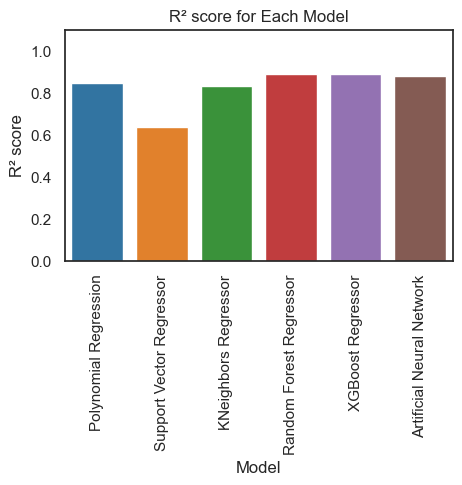

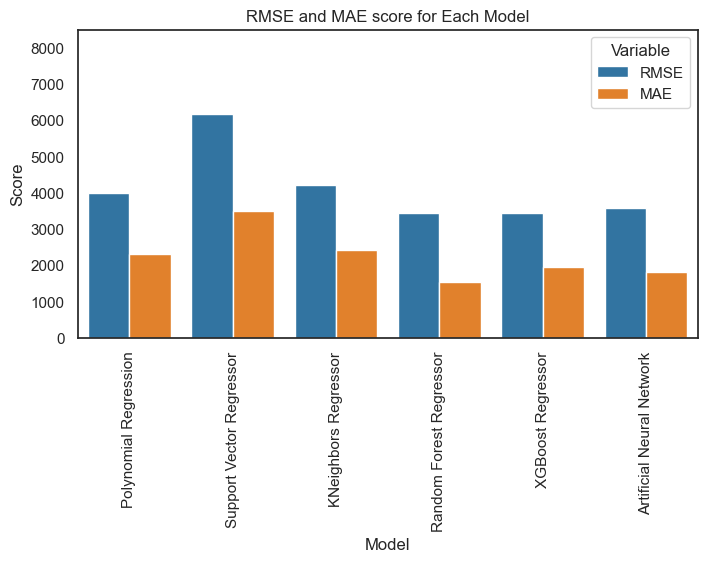

In [101]:
plot_bar(df_score_1)

# Scenario 2 (Without Zero Value)

In [61]:
# Make another dataset without any zero value in solar power generation
solar_df_2 = solar_df.copy()
solar_df_2 = solar_df_2[solar_df_2['Power Generated'] >= 2000]
solar_df_2.head()

,Date,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated,Average Temperature (°C)
2,2008-09-01,07:00:00,1,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418,20.56
3,2008-09-01,10:00:00,1,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477,20.56
4,2008-09-01,13:00:00,1,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069,20.56
5,2008-09-01,16:00:00,1,0.296915,69,28,7.5,0,10.0,20,23.0,29.85,16280,20.56
10,2008-09-02,07:00:00,1,0.398196,72,29,6.8,0,10.0,54,0.0,29.90,4939,22.22


In [62]:
# Split the data into X (meteorological and environmental variables) and y(solar power generated).
X_2 = solar_df_2[features].drop(columns='Power Generated')
y_2 = solar_df_2['Power Generated']

# Split both X and y into training and testing set with ratio 80:20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2,y_2, test_size = 0.2, random_state=42)

ss = StandardScaler().fit(X_train2)
X_train2 = ss.transform(X_train2)
X_test2 = ss.transform(X_test2)

In [84]:
def regression_score2(model, label, xt=X_test2, yt=y_test2):
    table = pd.Series({f'R\N{SUPERSCRIPT TWO} score': round(r2_score(yt, model.predict(xt)), 3),
                      'RMSE': round(np.sqrt(mean_squared_error(yt, model.predict(xt))), 3),
                      'MAE':round(np.mean(abs(yt - model.predict(xt).ravel())), 3)},
                  name= label)
    return table

# 1 . Polynomial Regression

In [63]:
pipe_lr2 = Pipeline(steps=[('pr', PolynomialFeatures(degree=2, include_bias=False)),
                           ('ss', StandardScaler()),
                           ('lr', LinearRegression())])
params_lr2 = {'pr__degree':[2,3,4,5],
            'pr__include_bias': [True, False]}
cv_lr2 = GridSearchCV(pipe_lr2, params_lr2, cv=4)
cv_lr2.fit(X_train2, y_train2)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pr',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('lr', LinearRegression())]),
             param_grid={'pr__degree': [2, 3, 4, 5],
                         'pr__include_bias': [True, False]})

In [85]:
poly_score2 = regression_score2(cv_lr2, 'Polynomial Regression')
poly_score2

R² score       0.815
RMSE        4137.582
MAE         3117.490
Name: Polynomial Regression, dtype: float64

# 2. Support Vector Regressor

In [67]:
pipe_svr2 = Pipeline(steps=[('pr',PolynomialFeatures(degree=2)),
                           ('ss', StandardScaler()),
                          ('svr', SVR(kernel='linear', degree=2))])
params_svr2 = {'pr__degree':[2,3,4],
             'svr__kernel':['linear','rbf','poly'],
             'svr__degree':[2,3,4,5]}
cv_svr2 = GridSearchCV(pipe_svr2, params_svr2, cv=4)
cv_svr2.fit(X_train2, y_train2)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pr', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('svr',
                                        SVR(degree=2, kernel='linear'))]),
             param_grid={'pr__degree': [2, 3, 4], 'svr__degree': [2, 3, 4, 5],
                         'svr__kernel': ['linear', 'rbf', 'poly']})

In [68]:
cv_svr2.best_params_

{'pr__degree': 4, 'svr__degree': 2, 'svr__kernel': 'linear'}

In [86]:
svr_score2 = regression_score2(cv_svr2, 'Support Vector Regressor')
svr_score2

R² score       0.487
RMSE        6893.552
MAE         5597.871
Name: Support Vector Regressor, dtype: float64

# 3. KNeighbors Regressor

In [70]:
pipe_knr2 =  Pipeline(steps=[('pr', PolynomialFeatures(degree=2)),
                           ('ss', StandardScaler()),
                           ('knr', KNeighborsRegressor(n_neighbors=2, weights='uniform'))])
params_knr2 = {'pr__degree':[2,3,4,5],
             'knr__n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
             'knr__weights':['uniform','distance']}
cv_knr2 = GridSearchCV(pipe_knr2, params_knr2, cv=4)
cv_knr2.fit(X_train2, y_train2)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pr', PolynomialFeatures()),
                                       ('ss', StandardScaler()),
                                       ('knr',
                                        KNeighborsRegressor(n_neighbors=2))]),
             param_grid={'knr__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20],
                         'knr__weights': ['uniform', 'distance'],
                         'pr__degree': [2, 3, 4, 5]})

In [71]:
cv_knr2.best_estimator_

Pipeline(steps=[('pr', PolynomialFeatures()), ('ss', StandardScaler()),
                ('knr',
                 KNeighborsRegressor(n_neighbors=8, weights='distance'))])

In [87]:
knr_score2 = regression_score2(cv_knr2, 'KNeighbors Regressor')
knr_score2

R² score       0.793
RMSE        4381.056
MAE         3386.543
Name: KNeighbors Regressor, dtype: float64

# 4. Random Forest

In [73]:
rf2 = RandomForestRegressor(n_jobs=-1)
params_rf2 = {'bootstrap': [True, False],
            'max_depth': [2*n+1 for n in range(10)],
            'n_estimators': [2*n+1 for n in range(20)],
            'max_features':['auto','sqrt','log2']}
cv_rf2 = GridSearchCV(rf2, params_rf2, cv=4)
cv_rf2.fit(X_train2, y_train2)

GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]})

In [74]:
cv_rf2.best_params_

{'bootstrap': True,
 'max_depth': 11,
 'max_features': 'auto',
 'n_estimators': 27}

In [88]:
rf_score2 = regression_score2(cv_rf2, 'Random Forest Regressor')
rf_score2

R² score       0.877
RMSE        3381.163
MAE         2331.331
Name: Random Forest Regressor, dtype: float64

# 5. XGBoost Regressor

In [76]:
xgb2 = XGBRegressor(n_jobs=-1)
params_xgb2 = {'n_estimators': [20*n+1 for n in range(10)],
             'learning_rate': [0.1*n+1 for n in range(10)],
             'max_depth': [n+1 for n in range(5)]}
cv_xgb2 = GridSearchCV(xgb2, params_xgb2, cv=4)
cv_xgb2.fit(X_train2, y_train2)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [77]:
cv_xgb2.best_params_

{'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 21}

In [89]:
xgb_score2 = regression_score2(cv_xgb2, 'XGBoost Regressor')
xgb_score2

R² score       0.819
RMSE        4096.735
MAE         3003.369
Name: XGBoost Regressor, dtype: float64

# 6. Artificial Neural Network

In [79]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import AUC

In [80]:
n_cols = X_train2.shape[1]
ann2 = Sequential()
ann2.add(Dense(units=100, activation = 'relu', input_shape= (n_cols,)))
ann2.add(Dense(units=100, activation='relu'))
ann2.add(Dense(units=200, activation='relu'))
ann2.add(Dense(units=1, activation='relu'))

ann2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy', 'mean_squared_error'])

ann2.fit(X_train2, y_train2, epochs = 1000, validation_data=(X_test2, y_test2), batch_size=200)


Epoch 1/1000
5/5 [==============================] - 1s 43ms/step - loss: 382863104.0000 - accuracy: 0.0000e+00 - mean_squared_error: 382863104.0000 - val_loss: 384737184.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 384737184.0000
Epoch 2/1000
5/5 [==============================] - 0s 16ms/step - loss: 382856320.0000 - accuracy: 0.0000e+00 - mean_squared_error: 382856320.0000 - val_loss: 384718016.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 384718016.0000
Epoch 3/1000
5/5 [==============================] - 0s 12ms/step - loss: 382831424.0000 - accuracy: 0.0000e+00 - mean_squared_error: 382831424.0000 - val_loss: 384685408.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 384685408.0000
Epoch 4/1000
5/5 [==============================] - 0s 16ms/step - loss: 382790688.0000 - accuracy: 0.0000e+00 - mean_squared_error: 382790688.0000 - val_loss: 384629952.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 384629952.0000
Epoch 5/1000
5/5 [==========

Epoch 35/1000
5/5 [==============================] - 0s 16ms/step - loss: 57573628.0000 - accuracy: 0.0000e+00 - mean_squared_error: 57573628.0000 - val_loss: 52873540.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 52873540.0000
Epoch 36/1000
5/5 [==============================] - 0s 12ms/step - loss: 54720516.0000 - accuracy: 0.0000e+00 - mean_squared_error: 54720516.0000 - val_loss: 51142296.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 51142296.0000
Epoch 37/1000
5/5 [==============================] - 0s 16ms/step - loss: 52205436.0000 - accuracy: 0.0000e+00 - mean_squared_error: 52205436.0000 - val_loss: 49930436.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 49930436.0000
Epoch 38/1000
5/5 [==============================] - 0s 12ms/step - loss: 49918156.0000 - accuracy: 0.0000e+00 - mean_squared_error: 49918156.0000 - val_loss: 48987480.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 48987480.0000
Epoch 39/1000
5/5 [=====================

5/5 [==============================] - 0s 16ms/step - loss: 25068424.0000 - accuracy: 0.0000e+00 - mean_squared_error: 25068424.0000 - val_loss: 30629840.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 30629840.0000
Epoch 104/1000
5/5 [==============================] - 0s 16ms/step - loss: 24999890.0000 - accuracy: 0.0000e+00 - mean_squared_error: 24999890.0000 - val_loss: 30556476.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 30556476.0000
Epoch 105/1000
5/5 [==============================] - 0s 16ms/step - loss: 24946264.0000 - accuracy: 0.0000e+00 - mean_squared_error: 24946264.0000 - val_loss: 30506908.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 30506908.0000
Epoch 106/1000
5/5 [==============================] - 0s 12ms/step - loss: 24894980.0000 - accuracy: 0.0000e+00 - mean_squared_error: 24894980.0000 - val_loss: 30366542.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 30366542.0000
Epoch 107/1000
5/5 [==============================]

5/5 [==============================] - 0s 16ms/step - loss: 23535102.0000 - accuracy: 0.0000e+00 - mean_squared_error: 23535102.0000 - val_loss: 28133866.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 28133866.0000
Epoch 138/1000
5/5 [==============================] - 0s 16ms/step - loss: 23499896.0000 - accuracy: 0.0000e+00 - mean_squared_error: 23499896.0000 - val_loss: 28104462.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 28104462.0000
Epoch 139/1000
5/5 [==============================] - 0s 16ms/step - loss: 23468990.0000 - accuracy: 0.0000e+00 - mean_squared_error: 23468990.0000 - val_loss: 28051878.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 28051878.0000
Epoch 140/1000
5/5 [==============================] - 0s 12ms/step - loss: 23428848.0000 - accuracy: 0.0000e+00 - mean_squared_error: 23428848.0000 - val_loss: 27971562.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 27971562.0000
Epoch 141/1000
5/5 [==============================]

5/5 [==============================] - 0s 16ms/step - loss: 22604096.0000 - accuracy: 0.0000e+00 - mean_squared_error: 22604094.0000 - val_loss: 26564788.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 26564788.0000
Epoch 172/1000
5/5 [==============================] - 0s 16ms/step - loss: 22580654.0000 - accuracy: 0.0000e+00 - mean_squared_error: 22580654.0000 - val_loss: 26551186.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 26551186.0000
Epoch 173/1000
5/5 [==============================] - 0s 16ms/step - loss: 22567554.0000 - accuracy: 0.0000e+00 - mean_squared_error: 22567554.0000 - val_loss: 26490738.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 26490738.0000
Epoch 174/1000
5/5 [==============================] - 0s 16ms/step - loss: 22537170.0000 - accuracy: 0.0000e+00 - mean_squared_error: 22537170.0000 - val_loss: 26434094.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 26434094.0000
Epoch 175/1000
5/5 [==============================]

5/5 [==============================] - 0s 16ms/step - loss: 22051194.0000 - accuracy: 0.0000e+00 - mean_squared_error: 22051194.0000 - val_loss: 25557058.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 25557058.0000
Epoch 206/1000
5/5 [==============================] - 0s 16ms/step - loss: 22030660.0000 - accuracy: 0.0000e+00 - mean_squared_error: 22030660.0000 - val_loss: 25518340.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 25518340.0000
Epoch 207/1000
5/5 [==============================] - 0s 12ms/step - loss: 22019042.0000 - accuracy: 0.0000e+00 - mean_squared_error: 22019042.0000 - val_loss: 25483132.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 25483132.0000
Epoch 208/1000
5/5 [==============================] - 0s 16ms/step - loss: 22007780.0000 - accuracy: 0.0000e+00 - mean_squared_error: 22007780.0000 - val_loss: 25435914.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 25435914.0000
Epoch 209/1000
5/5 [==============================]

5/5 [==============================] - 0s 11ms/step - loss: 21687212.0000 - accuracy: 0.0000e+00 - mean_squared_error: 21687212.0000 - val_loss: 24996908.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 24996908.0000
Epoch 240/1000
5/5 [==============================] - 0s 16ms/step - loss: 21671772.0000 - accuracy: 0.0000e+00 - mean_squared_error: 21671772.0000 - val_loss: 25015140.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 25015140.0000
Epoch 241/1000
5/5 [==============================] - 0s 16ms/step - loss: 21674414.0000 - accuracy: 0.0000e+00 - mean_squared_error: 21674414.0000 - val_loss: 24997992.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 24997992.0000
Epoch 242/1000
5/5 [==============================] - 0s 16ms/step - loss: 21658884.0000 - accuracy: 0.0000e+00 - mean_squared_error: 21658884.0000 - val_loss: 24948356.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 24948356.0000
Epoch 243/1000
5/5 [==============================]

5/5 [==============================] - 0s 16ms/step - loss: 21423028.0000 - accuracy: 0.0000e+00 - mean_squared_error: 21423028.0000 - val_loss: 24607400.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 24607400.0000
Epoch 274/1000
5/5 [==============================] - 0s 12ms/step - loss: 21403564.0000 - accuracy: 0.0000e+00 - mean_squared_error: 21403564.0000 - val_loss: 24602820.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 24602820.0000
Epoch 275/1000
5/5 [==============================] - 0s 16ms/step - loss: 21406136.0000 - accuracy: 0.0000e+00 - mean_squared_error: 21406136.0000 - val_loss: 24585666.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 24585666.0000
Epoch 276/1000
5/5 [==============================] - 0s 16ms/step - loss: 21393686.0000 - accuracy: 0.0000e+00 - mean_squared_error: 21393686.0000 - val_loss: 24579788.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 24579788.0000
Epoch 277/1000
5/5 [==============================]

5/5 [==============================] - 0s 16ms/step - loss: 21174140.0000 - accuracy: 0.0000e+00 - mean_squared_error: 21174140.0000 - val_loss: 24290482.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 24290482.0000
Epoch 308/1000
5/5 [==============================] - 0s 16ms/step - loss: 21174424.0000 - accuracy: 0.0000e+00 - mean_squared_error: 21174424.0000 - val_loss: 24302432.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 24302432.0000
Epoch 309/1000
5/5 [==============================] - 0s 16ms/step - loss: 21160882.0000 - accuracy: 0.0000e+00 - mean_squared_error: 21160878.0000 - val_loss: 24287896.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 24287896.0000
Epoch 310/1000
5/5 [==============================] - 0s 12ms/step - loss: 21154048.0000 - accuracy: 0.0000e+00 - mean_squared_error: 21154048.0000 - val_loss: 24291262.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 24291262.0000
Epoch 311/1000
5/5 [==============================]

5/5 [==============================] - 0s 12ms/step - loss: 20983198.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20983198.0000 - val_loss: 24088208.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 24088208.0000
Epoch 342/1000
5/5 [==============================] - 0s 16ms/step - loss: 20991422.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20991422.0000 - val_loss: 24066726.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 24066726.0000
Epoch 343/1000
5/5 [==============================] - 0s 12ms/step - loss: 20983466.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20983466.0000 - val_loss: 24070516.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 24070516.0000
Epoch 344/1000
5/5 [==============================] - 0s 16ms/step - loss: 20965752.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20965752.0000 - val_loss: 24052154.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 24052154.0000
Epoch 345/1000
5/5 [==============================]

5/5 [==============================] - 0s 16ms/step - loss: 20817892.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20817892.0000 - val_loss: 23959302.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23959302.0000
Epoch 376/1000
5/5 [==============================] - 0s 12ms/step - loss: 20816606.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20816606.0000 - val_loss: 23935546.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23935546.0000
Epoch 377/1000
5/5 [==============================] - 0s 16ms/step - loss: 20813900.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20813900.0000 - val_loss: 23916550.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23916550.0000
Epoch 378/1000
5/5 [==============================] - 0s 12ms/step - loss: 20800834.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20800834.0000 - val_loss: 23920258.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23920258.0000
Epoch 379/1000
5/5 [==============================]

5/5 [==============================] - 0s 16ms/step - loss: 20665838.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20665838.0000 - val_loss: 23784544.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23784544.0000
Epoch 410/1000
5/5 [==============================] - 0s 16ms/step - loss: 20674142.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20674142.0000 - val_loss: 23762304.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23762304.0000
Epoch 411/1000
5/5 [==============================] - 0s 16ms/step - loss: 20661444.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20661444.0000 - val_loss: 23783390.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23783390.0000
Epoch 412/1000
5/5 [==============================] - 0s 16ms/step - loss: 20644674.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20644674.0000 - val_loss: 23789980.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23789980.0000
Epoch 413/1000
5/5 [==============================]

5/5 [==============================] - 0s 20ms/step - loss: 20502596.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20502596.0000 - val_loss: 23673880.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23673880.0000
Epoch 444/1000
5/5 [==============================] - 0s 16ms/step - loss: 20499408.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20499406.0000 - val_loss: 23667978.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23667978.0000
Epoch 445/1000
5/5 [==============================] - 0s 16ms/step - loss: 20481180.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20481180.0000 - val_loss: 23698700.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23698700.0000
Epoch 446/1000
5/5 [==============================] - 0s 14ms/step - loss: 20481492.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20481492.0000 - val_loss: 23709854.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23709854.0000
Epoch 447/1000
5/5 [==============================]

5/5 [==============================] - 0s 12ms/step - loss: 20314040.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20314040.0000 - val_loss: 23640228.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23640228.0000
Epoch 478/1000
5/5 [==============================] - 0s 16ms/step - loss: 20309846.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20309846.0000 - val_loss: 23622962.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23622962.0000
Epoch 479/1000
5/5 [==============================] - 0s 16ms/step - loss: 20301160.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20301160.0000 - val_loss: 23591642.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23591642.0000
Epoch 480/1000
5/5 [==============================] - 0s 16ms/step - loss: 20302206.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20302206.0000 - val_loss: 23576442.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23576442.0000
Epoch 481/1000
5/5 [==============================]

5/5 [==============================] - 0s 16ms/step - loss: 20117848.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20117848.0000 - val_loss: 23515300.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23515300.0000
Epoch 512/1000
5/5 [==============================] - 0s 16ms/step - loss: 20125608.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20125608.0000 - val_loss: 23502262.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23502262.0000
Epoch 513/1000
5/5 [==============================] - 0s 16ms/step - loss: 20101876.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20101876.0000 - val_loss: 23503782.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23503782.0000
Epoch 514/1000
5/5 [==============================] - 0s 16ms/step - loss: 20086252.0000 - accuracy: 0.0000e+00 - mean_squared_error: 20086254.0000 - val_loss: 23417984.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23417984.0000
Epoch 515/1000
5/5 [==============================]

5/5 [==============================] - 0s 16ms/step - loss: 19875682.0000 - accuracy: 0.0000e+00 - mean_squared_error: 19875682.0000 - val_loss: 23342438.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23342438.0000
Epoch 546/1000
5/5 [==============================] - 0s 16ms/step - loss: 19851738.0000 - accuracy: 0.0000e+00 - mean_squared_error: 19851738.0000 - val_loss: 23331864.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23331864.0000
Epoch 547/1000
5/5 [==============================] - 0s 16ms/step - loss: 19848302.0000 - accuracy: 0.0000e+00 - mean_squared_error: 19848300.0000 - val_loss: 23336136.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23336136.0000
Epoch 548/1000
5/5 [==============================] - 0s 16ms/step - loss: 19838402.0000 - accuracy: 0.0000e+00 - mean_squared_error: 19838402.0000 - val_loss: 23307948.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23307948.0000
Epoch 549/1000
5/5 [==============================]

5/5 [==============================] - 0s 15ms/step - loss: 19602038.0000 - accuracy: 0.0000e+00 - mean_squared_error: 19602038.0000 - val_loss: 23149396.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23149396.0000
Epoch 580/1000
5/5 [==============================] - 0s 15ms/step - loss: 19595188.0000 - accuracy: 0.0000e+00 - mean_squared_error: 19595188.0000 - val_loss: 23195274.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23195274.0000
Epoch 581/1000
5/5 [==============================] - 0s 15ms/step - loss: 19586598.0000 - accuracy: 0.0000e+00 - mean_squared_error: 19586598.0000 - val_loss: 23220378.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23220378.0000
Epoch 582/1000
5/5 [==============================] - 0s 13ms/step - loss: 19579512.0000 - accuracy: 0.0000e+00 - mean_squared_error: 19579512.0000 - val_loss: 23204778.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23204778.0000
Epoch 583/1000
5/5 [==============================]

5/5 [==============================] - 0s 12ms/step - loss: 19365372.0000 - accuracy: 0.0000e+00 - mean_squared_error: 19365372.0000 - val_loss: 23052264.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23052264.0000
Epoch 614/1000
5/5 [==============================] - 0s 16ms/step - loss: 19305708.0000 - accuracy: 0.0000e+00 - mean_squared_error: 19305708.0000 - val_loss: 23097122.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23097122.0000
Epoch 615/1000
5/5 [==============================] - 0s 12ms/step - loss: 19308148.0000 - accuracy: 0.0000e+00 - mean_squared_error: 19308148.0000 - val_loss: 23082472.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23082472.0000
Epoch 616/1000
5/5 [==============================] - 0s 18ms/step - loss: 19268952.0000 - accuracy: 0.0000e+00 - mean_squared_error: 19268952.0000 - val_loss: 23068166.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23068166.0000
Epoch 617/1000
5/5 [==============================]

5/5 [==============================] - 0s 16ms/step - loss: 18914742.0000 - accuracy: 0.0000e+00 - mean_squared_error: 18914742.0000 - val_loss: 23000468.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23000468.0000
Epoch 648/1000
5/5 [==============================] - 0s 16ms/step - loss: 18893838.0000 - accuracy: 0.0000e+00 - mean_squared_error: 18893836.0000 - val_loss: 23010712.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23010712.0000
Epoch 649/1000
5/5 [==============================] - 0s 16ms/step - loss: 18902104.0000 - accuracy: 0.0000e+00 - mean_squared_error: 18902104.0000 - val_loss: 22994546.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 22994546.0000
Epoch 650/1000
5/5 [==============================] - 0s 16ms/step - loss: 18865042.0000 - accuracy: 0.0000e+00 - mean_squared_error: 18865042.0000 - val_loss: 23014944.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 23014944.0000
Epoch 651/1000
5/5 [==============================]

5/5 [==============================] - 0s 12ms/step - loss: 18417776.0000 - accuracy: 0.0000e+00 - mean_squared_error: 18417776.0000 - val_loss: 22906140.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 22906140.0000
Epoch 682/1000
5/5 [==============================] - 0s 17ms/step - loss: 18409786.0000 - accuracy: 0.0000e+00 - mean_squared_error: 18409784.0000 - val_loss: 22903812.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 22903812.0000
Epoch 683/1000
5/5 [==============================] - 0s 16ms/step - loss: 18395426.0000 - accuracy: 0.0000e+00 - mean_squared_error: 18395426.0000 - val_loss: 22906392.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 22906392.0000
Epoch 684/1000
5/5 [==============================] - 0s 17ms/step - loss: 18386076.0000 - accuracy: 0.0000e+00 - mean_squared_error: 18386076.0000 - val_loss: 22925038.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 22925038.0000
Epoch 685/1000
5/5 [==============================]

5/5 [==============================] - 0s 13ms/step - loss: 17968260.0000 - accuracy: 0.0000e+00 - mean_squared_error: 17968260.0000 - val_loss: 22756520.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 22756520.0000
Epoch 716/1000
5/5 [==============================] - 0s 11ms/step - loss: 17973066.0000 - accuracy: 0.0000e+00 - mean_squared_error: 17973066.0000 - val_loss: 22787084.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 22787084.0000
Epoch 717/1000
5/5 [==============================] - 0s 14ms/step - loss: 17948928.0000 - accuracy: 0.0000e+00 - mean_squared_error: 17948928.0000 - val_loss: 22765394.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 22765394.0000
Epoch 718/1000
5/5 [==============================] - 0s 15ms/step - loss: 17962554.0000 - accuracy: 0.0000e+00 - mean_squared_error: 17962554.0000 - val_loss: 22791588.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 22791588.0000
Epoch 719/1000
5/5 [==============================]

5/5 [==============================] - 0s 15ms/step - loss: 17577852.0000 - accuracy: 0.0000e+00 - mean_squared_error: 17577852.0000 - val_loss: 22528088.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 22528088.0000
Epoch 750/1000
5/5 [==============================] - 0s 13ms/step - loss: 17577160.0000 - accuracy: 0.0000e+00 - mean_squared_error: 17577160.0000 - val_loss: 22490628.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 22490628.0000
Epoch 751/1000
5/5 [==============================] - 0s 16ms/step - loss: 17576544.0000 - accuracy: 0.0000e+00 - mean_squared_error: 17576544.0000 - val_loss: 22465402.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 22465402.0000
Epoch 752/1000
5/5 [==============================] - 0s 16ms/step - loss: 17543602.0000 - accuracy: 0.0000e+00 - mean_squared_error: 17543602.0000 - val_loss: 22491556.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 22491556.0000
Epoch 753/1000
5/5 [==============================]

5/5 [==============================] - 0s 13ms/step - loss: 17217874.0000 - accuracy: 0.0000e+00 - mean_squared_error: 17217872.0000 - val_loss: 21968242.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21968242.0000
Epoch 784/1000
5/5 [==============================] - 0s 16ms/step - loss: 17180956.0000 - accuracy: 0.0000e+00 - mean_squared_error: 17180956.0000 - val_loss: 21990120.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21990120.0000
Epoch 785/1000
5/5 [==============================] - 0s 18ms/step - loss: 17171414.0000 - accuracy: 0.0000e+00 - mean_squared_error: 17171414.0000 - val_loss: 21952186.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21952186.0000
Epoch 786/1000
5/5 [==============================] - 0s 16ms/step - loss: 17162424.0000 - accuracy: 0.0000e+00 - mean_squared_error: 17162424.0000 - val_loss: 21974050.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21974050.0000
Epoch 787/1000
5/5 [==============================]

5/5 [==============================] - 0s 12ms/step - loss: 16921220.0000 - accuracy: 0.0000e+00 - mean_squared_error: 16921220.0000 - val_loss: 21636186.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21636186.0000
Epoch 818/1000
5/5 [==============================] - 0s 17ms/step - loss: 16867352.0000 - accuracy: 0.0000e+00 - mean_squared_error: 16867352.0000 - val_loss: 21684740.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21684740.0000
Epoch 819/1000
5/5 [==============================] - 0s 16ms/step - loss: 16935652.0000 - accuracy: 0.0000e+00 - mean_squared_error: 16935652.0000 - val_loss: 21772496.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21772496.0000
Epoch 820/1000
5/5 [==============================] - 0s 12ms/step - loss: 16912074.0000 - accuracy: 0.0000e+00 - mean_squared_error: 16912074.0000 - val_loss: 21602252.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21602252.0000
Epoch 821/1000
5/5 [==============================]

5/5 [==============================] - 0s 16ms/step - loss: 16665933.0000 - accuracy: 0.0000e+00 - mean_squared_error: 16665933.0000 - val_loss: 21503754.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21503754.0000
Epoch 852/1000
5/5 [==============================] - 0s 12ms/step - loss: 16657778.0000 - accuracy: 0.0000e+00 - mean_squared_error: 16657778.0000 - val_loss: 21419414.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21419414.0000
Epoch 853/1000
5/5 [==============================] - 0s 16ms/step - loss: 16655653.0000 - accuracy: 0.0000e+00 - mean_squared_error: 16655653.0000 - val_loss: 21420574.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21420574.0000
Epoch 854/1000
5/5 [==============================] - 0s 16ms/step - loss: 16663689.0000 - accuracy: 0.0000e+00 - mean_squared_error: 16663689.0000 - val_loss: 21496532.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21496532.0000
Epoch 855/1000
5/5 [==============================]

5/5 [==============================] - 0s 16ms/step - loss: 16415397.0000 - accuracy: 0.0000e+00 - mean_squared_error: 16415397.0000 - val_loss: 21308334.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21308334.0000
Epoch 886/1000
5/5 [==============================] - 0s 12ms/step - loss: 16431365.0000 - accuracy: 0.0000e+00 - mean_squared_error: 16431365.0000 - val_loss: 21282730.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21282730.0000
Epoch 887/1000
5/5 [==============================] - 0s 16ms/step - loss: 16384877.0000 - accuracy: 0.0000e+00 - mean_squared_error: 16384877.0000 - val_loss: 21332244.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21332244.0000
Epoch 888/1000
5/5 [==============================] - 0s 16ms/step - loss: 16427340.0000 - accuracy: 0.0000e+00 - mean_squared_error: 16427340.0000 - val_loss: 21371126.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21371126.0000
Epoch 889/1000
5/5 [==============================]

5/5 [==============================] - 0s 16ms/step - loss: 16153615.0000 - accuracy: 0.0000e+00 - mean_squared_error: 16153614.0000 - val_loss: 21187580.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21187582.0000
Epoch 920/1000
5/5 [==============================] - 0s 12ms/step - loss: 16134435.0000 - accuracy: 0.0000e+00 - mean_squared_error: 16134435.0000 - val_loss: 21144558.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21144556.0000
Epoch 921/1000
5/5 [==============================] - 0s 16ms/step - loss: 16166717.0000 - accuracy: 0.0000e+00 - mean_squared_error: 16166717.0000 - val_loss: 21128050.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21128050.0000
Epoch 922/1000
5/5 [==============================] - 0s 12ms/step - loss: 16124022.0000 - accuracy: 0.0000e+00 - mean_squared_error: 16124022.0000 - val_loss: 21057036.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 21057036.0000
Epoch 923/1000
5/5 [==============================]

5/5 [==============================] - 0s 16ms/step - loss: 15860101.0000 - accuracy: 0.0000e+00 - mean_squared_error: 15860101.0000 - val_loss: 20902866.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 20902866.0000
Epoch 954/1000
5/5 [==============================] - 0s 12ms/step - loss: 15873413.0000 - accuracy: 0.0000e+00 - mean_squared_error: 15873413.0000 - val_loss: 20871764.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 20871764.0000
Epoch 955/1000
5/5 [==============================] - 0s 16ms/step - loss: 15846948.0000 - accuracy: 0.0000e+00 - mean_squared_error: 15846948.0000 - val_loss: 20879112.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 20879112.0000
Epoch 956/1000
5/5 [==============================] - 0s 16ms/step - loss: 15855832.0000 - accuracy: 0.0000e+00 - mean_squared_error: 15855832.0000 - val_loss: 20812514.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 20812514.0000
Epoch 957/1000
5/5 [==============================]

5/5 [==============================] - 0s 16ms/step - loss: 15593870.0000 - accuracy: 0.0000e+00 - mean_squared_error: 15593870.0000 - val_loss: 20635812.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 20635812.0000
Epoch 988/1000
5/5 [==============================] - 0s 16ms/step - loss: 15581558.0000 - accuracy: 0.0000e+00 - mean_squared_error: 15581558.0000 - val_loss: 20585450.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 20585450.0000
Epoch 989/1000
5/5 [==============================] - 0s 16ms/step - loss: 15586635.0000 - accuracy: 0.0000e+00 - mean_squared_error: 15586635.0000 - val_loss: 20557812.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 20557814.0000
Epoch 990/1000
5/5 [==============================] - 0s 16ms/step - loss: 15568507.0000 - accuracy: 0.0000e+00 - mean_squared_error: 15568507.0000 - val_loss: 20616518.0000 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 20616518.0000
Epoch 991/1000
5/5 [==============================]

In [90]:
ann_score2 = regression_score2(ann2, 'Artificial Neural Network')
ann_score2

8/8 [==============================] - 0s 1ms/step


R² score       0.778
RMSE        4537.234
MAE         3456.893
Name: Artificial Neural Network, dtype: float64

# Overall Score (Scenario 2)

In [91]:
df_score_2 = pd.concat([poly_score2, svr_score2, knr_score2, rf_score2, xgb_score2, ann_score2], axis=1).T
df_score_2

,R² score,RMSE,MAE
Polynomial Regression,0.815,4137.582,3117.490
Support Vector Regressor,0.487,6893.552,5597.871
KNeighbors Regressor,0.793,4381.056,3386.543
Random Forest Regressor,0.877,3381.163,2331.331
XGBoost Regressor,0.819,4096.735,3003.369
Artificial Neural Network,0.778,4537.234,3456.893


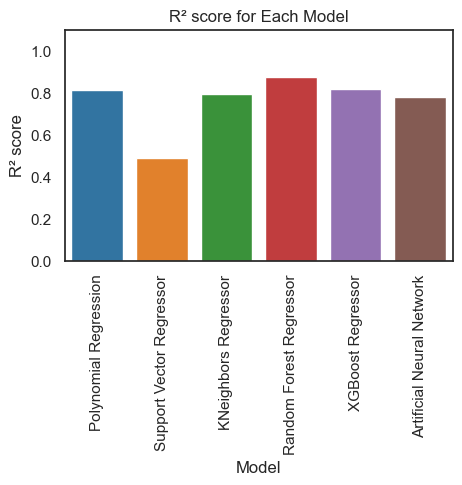

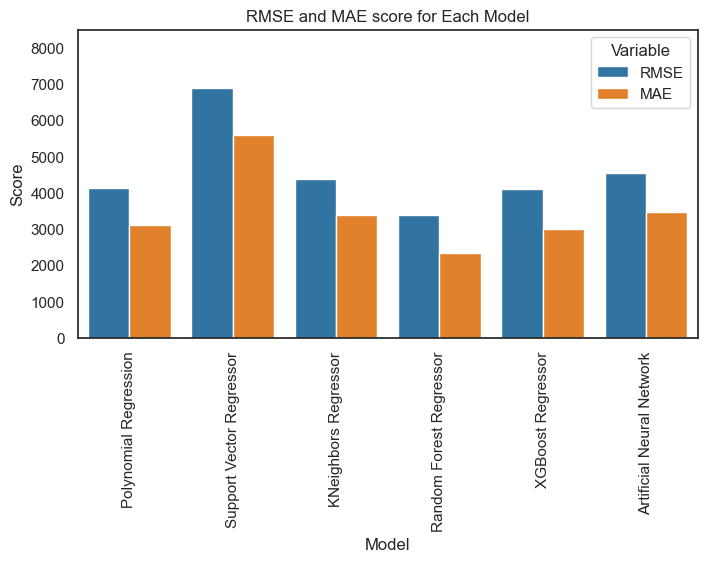

In [102]:
plot_bar(df_score_2)

In [103]:
df_pred2 = y_test2.to_frame().rename(columns={'Power Generated': 'Actual Output'})
df_pred2['Polynomial Regression Prediction'] = cv_lr2.predict(X_test2)
df_pred2['Support Vector Regressor Prediction'] = cv_svr2.predict(X_test2)
df_pred2['KNeighbors Regressor Prediction'] = cv_knr2.predict(X_test2)
df_pred2['Random Forest Regressor Prediction'] = cv_rf2.predict(X_test2)
df_pred2['XGBoost Regressor Prediction'] = cv_xgb2.predict(X_test2)
df_pred2['Artificial Neural Network Prediction'] = ann2.predict(X_test2)

pred_col2 = df_pred2.columns.to_list()[1:7] 
for col in pred_col2:
    df_pred2['{} Percentage Error (%)'.format(col)] = abs((df_pred2['Actual Output'] - df_pred2[col])/df_pred2['Actual Output']) * 100

8/8 [==============================] - 0s 3ms/step


In [104]:
df_pred2.head()

,Actual Output,Polynomial Regression Prediction,Support Vector Regressor Prediction,KNeighbors Regressor Prediction,Random Forest Regressor Prediction,XGBoost Regressor Prediction,Artificial Neural Network Prediction,Polynomial Regression Prediction Percentage Error (%),Support Vector Regressor Prediction Percentage Error (%),KNeighbors Regressor Prediction Percentage Error (%),Random Forest Regressor Prediction Percentage Error (%),XGBoost Regressor Prediction Percentage Error (%),Artificial Neural Network Prediction Percentage Error (%)
843,10192,8447.611774,12439.059607,7140.978614,7567.864198,-1465.947388,7294.554688,17.115269,22.047288,29.935453,25.747015,114.383314,28.428624
2413,21417,16572.697825,18638.250888,21155.638247,20901.371983,20408.871094,14608.645508,22.618958,12.974502,1.220347,2.407564,4.707143,31.789487
2714,3997,6927.006711,15230.460623,6434.150343,5327.931856,4248.854980,5757.438477,73.305147,281.047301,60.974489,33.298270,6.301100,44.043995
197,11864,15205.376264,17588.041947,14133.335493,11232.740741,6979.274414,14287.306641,28.163994,48.247151,19.127912,5.320796,41.172670,20.425713
2476,29027,28872.550071,20433.353926,32043.133806,32247.523911,35035.125000,30647.236328,0.532091,29.605698,10.390787,11.094925,20.698401,5.581825


In [105]:
pred_col2

['Polynomial Regression Prediction',
 'Support Vector Regressor Prediction',
 'KNeighbors Regressor Prediction',
 'Random Forest Regressor Prediction',
 'XGBoost Regressor Prediction',
 'Artificial Neural Network Prediction']

In [106]:
a = df_pred2[['{} Percentage Error (%)'.format(x) for x in pred_col2]].mean(axis=0).values
cols = df_score_2.index
pd.DataFrame(a,cols).rename(columns={0:'Mean Absolute Percentage Error (%)'})

,Mean Absolute Percentage Error (%)
Polynomial Regression,25.667811
Support Vector Regressor,57.744700
KNeighbors Regressor,31.807779
Random Forest Regressor,19.835181
XGBoost Regressor,28.930204
Artificial Neural Network,26.480844


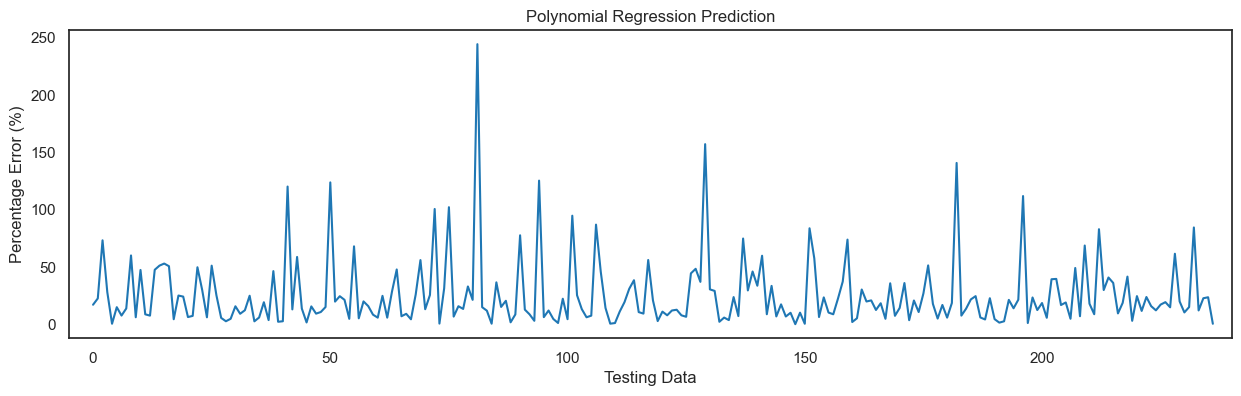

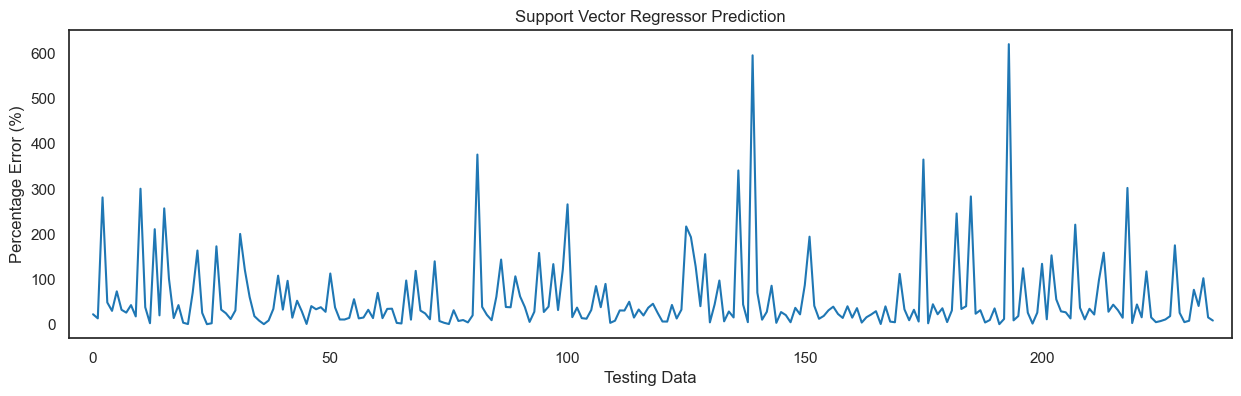

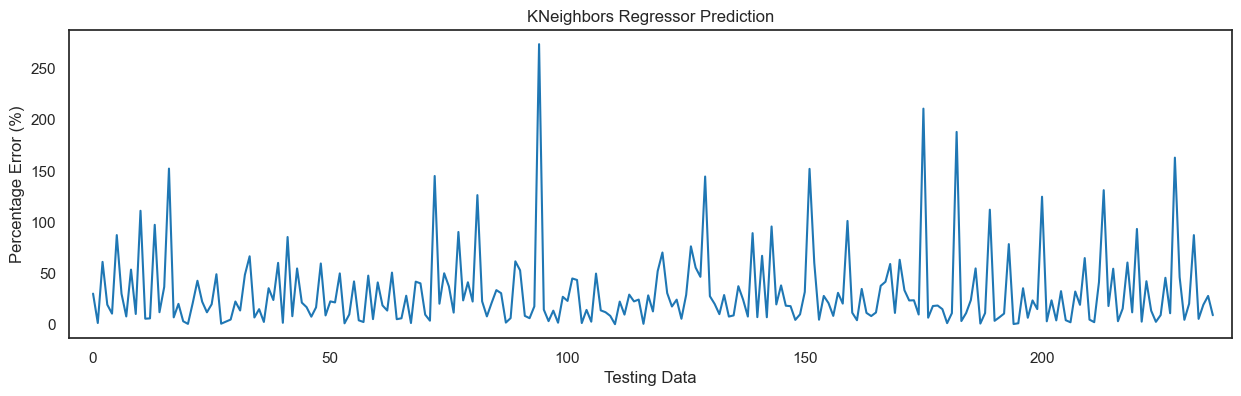

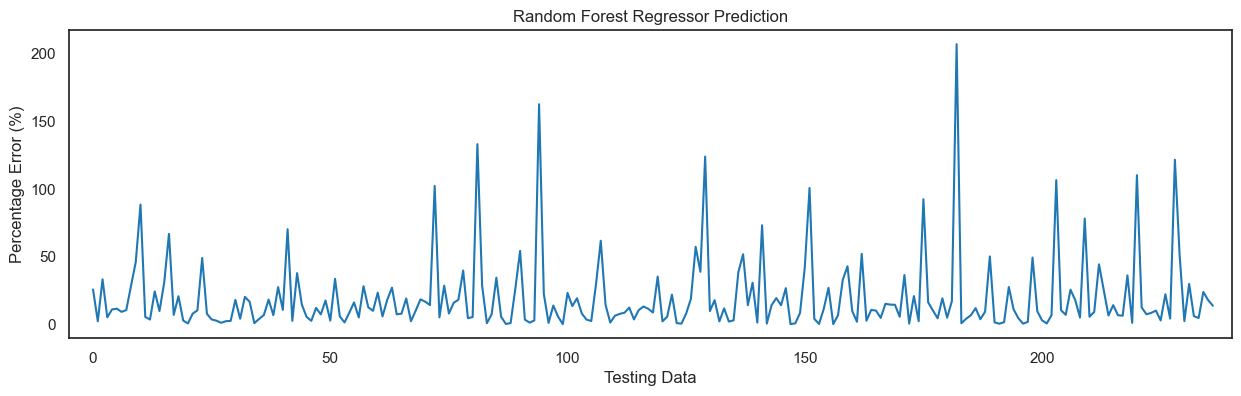

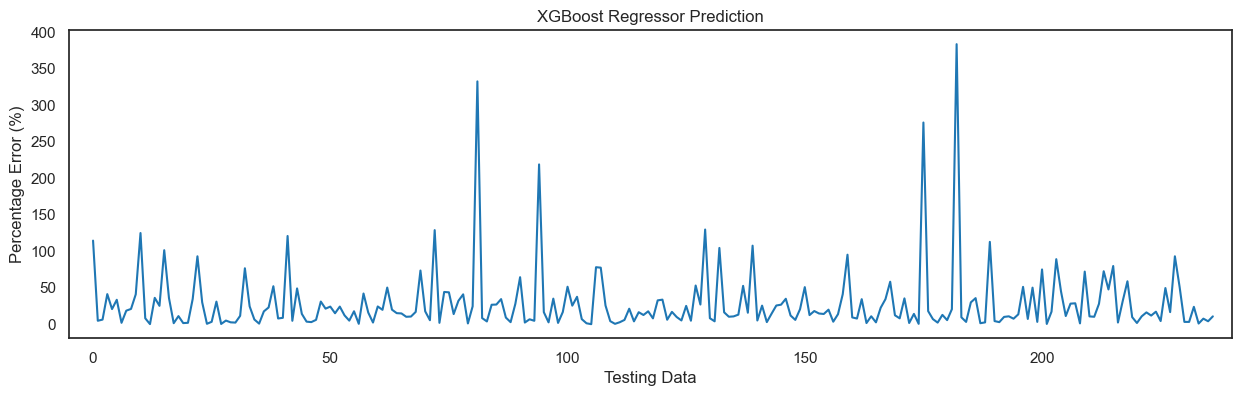

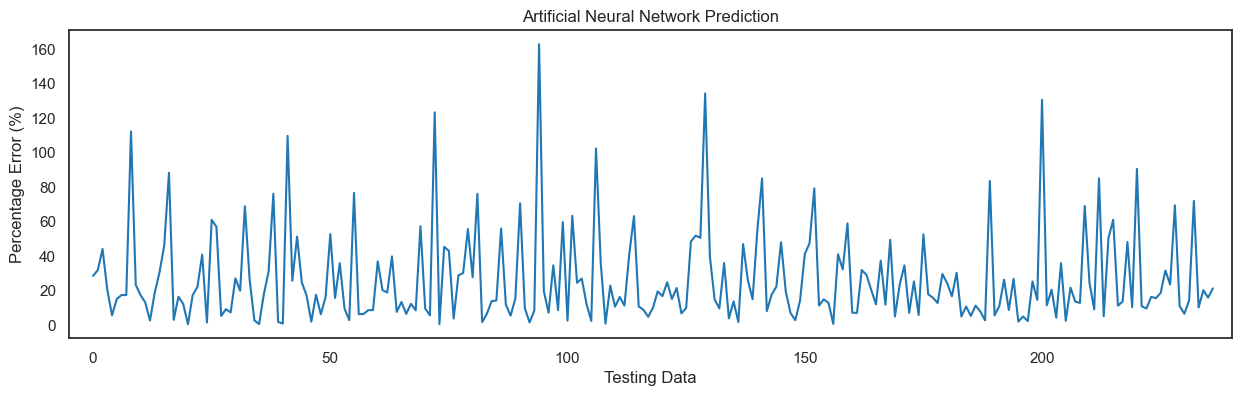

In [107]:
n = df_pred2.shape[0]
for col in pred_col2:
    fig = plt.figure(figsize=(15,4))
    plt.plot(range(n), df_pred2['{} Percentage Error (%)'.format(col)])
    plt.title(col)
    plt.xlim([-5,240])
    plt.xlabel('Testing Data')
    plt.ylabel('Percentage Error (%)')
    plt.show()